In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Assignment 2/experiment_dataset.csv')

In [24]:
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


Question 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

In [25]:
CTR_v = df.groupby('Variant')['CTR'].mean()
TS_v = df.groupby('Variant')['Time Spent'].mean()

Let's set 'Unnamed:0' into 'Index'

In [26]:
new_column_names = {'Unnamed: 0': 'Index'}
df = df.rename(columns=new_column_names)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


1. Check statistically significant in location

In [28]:
df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


This looks very similar. Let's do an ANOVA Test. If they are statistically same, they would have a high P-value.

In [29]:
# checking CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [30]:
# checking Time Spent
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


Since the high P-value. There is no difference in statistically significant which means we do not have to considering those variables. 

2. Check statistically significant in device

In [31]:
df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


In [32]:
Dev_1 = df[df['Device'] == 'Device1']['CTR']
Dev_2 = df[df['Device'] == 'Device2']['CTR']
Dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [33]:
Dev_1 = df[df['Device'] == 'Device1']['Time Spent']
Dev_2 = df[df['Device'] == 'Device2']['Time Spent']
Dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


Same result with the location. 

Question 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

T-test:CTR

In [34]:
Control = df[df['Variant'] == 'Control']['CTR'] 
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Variant_A = df[df['Variant'] == 'Variant A']['CTR']

t_stat_a, p_val_a = stats.ttest_ind(Control, Variant_A)
t_stat_b, p_val_b = stats.ttest_ind(Control, Variant_B)
t_stat_ba, p_val_ba = stats.ttest_ind(Variant_A, Variant_B)

print(f"T-statistic B: {t_stat_b}")
print(f"P-value B: {p_val_b}")
print(f"T-statistic A: {t_stat_a}")
print(f"P-value A: {p_val_a}")
print(f"T-statistic AB: {t_stat_ba}")
print(f"P-value AB: {p_val_ba}")

T-statistic B: -6.4718143491783255
P-value B: 1.8743198199982106e-10
T-statistic A: -13.829424737499187
P-value A: 1.9602781373243157e-38
T-statistic AB: 7.08499696316128
P-value AB: 3.587180487986577e-12


T-test:Time Spent

In [35]:
Control_t = df[df['Variant'] == 'Control']['Time Spent'] 
Variant_B_t = df[df['Variant'] == 'Variant B']['Time Spent']
Variant_A_t = df[df['Variant'] == 'Variant A']['Time Spent']

t_stat_a_t, p_val_a_t = stats.ttest_ind(Control_t, Variant_A_t)
t_stat_b_t, p_val_b_t = stats.ttest_ind(Control_t, Variant_B_t)
t_stat_ba, p_val_ba = stats.ttest_ind(Variant_A_t, Variant_B_t)

print(f"T-statistic B: {t_stat_b_t}")
print(f"P-value B: {p_val_b_t}")
print(f"T-statistic A: {t_stat_a_t}")
print(f"P-value A: {p_val_a_t}")
print(f"T-statistic A: {t_stat_ba}")
print(f"P-value A: {p_val_ba}")

T-statistic B: -8.174237395991806
P-value B: 1.496358076285182e-15
T-statistic A: -12.142363487472364
P-value A: 8.488565644996449e-31
T-statistic A: 3.6788175394209075
P-value A: 0.0002534771014765265


By comparing those 3 Variants. we find that there are significant difference between those variants.  

let's do a ANOVA test to see if there is difference between the means of them. 

ANOVA Test:CTR. The difference between the means of all 3 groups

In [38]:
Control = df[df['Variant'] == 'Control']['CTR'] 
Variant_B = df[df['Variant'] == 'Variant B']['CTR']
Variant_A = df[df['Variant'] == 'Variant A']['CTR']

f_stat, p_val = stats.f_oneway(Control, Variant_B, Variant_A)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.58891593622702
P-value: 5.638952705781554e-38


ANOVA Test:Time Spent. The difference between the means of all 3 groups

In [39]:
Control_t = df[df['Variant'] == 'Control']['Time Spent'] 
Variant_B_t = df[df['Variant'] == 'Variant B']['Time Spent']
Variant_A_t = df[df['Variant'] == 'Variant A']['Time Spent']
f_stat, p_val = stats.f_oneway(Control_t, Variant_B_t, Variant_A_t)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


The ANOVA Test also showed that the difference in meam. 

In [40]:
df.corr(numeric_only=True)

,Index,Age,Time Spent,CTR
Index,1.000000,0.00360,0.009739,-0.015237
Age,0.003600,1.00000,0.001970,-0.001080
Time Spent,0.009739,0.00197,1.000000,0.163598
CTR,-0.015237,-0.00108,0.163598,1.000000


The average CTR for Variant A, B & Control

In [41]:
CTR_v.sort_values(ascending=False)

Variant
Variant A    0.120269
Variant B    0.108933
Control      0.098554
Name: CTR, dtype: float64

The average Time Spent for Variant A, B & Control

In [42]:
TS_v.sort_values(ascending=False)

Variant
Variant A    24.805547
Variant B    23.343783
Control      20.070781
Name: Time Spent, dtype: float64

Based on those data, both Variable A & B had influence on the CTR & Time Spents. The Variable A has better performence than Variable B.

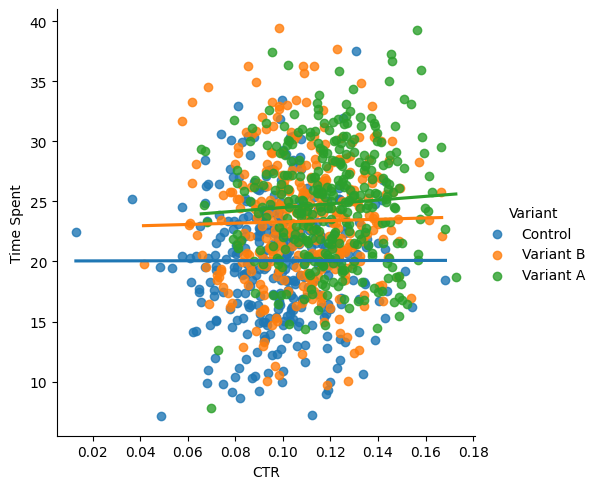

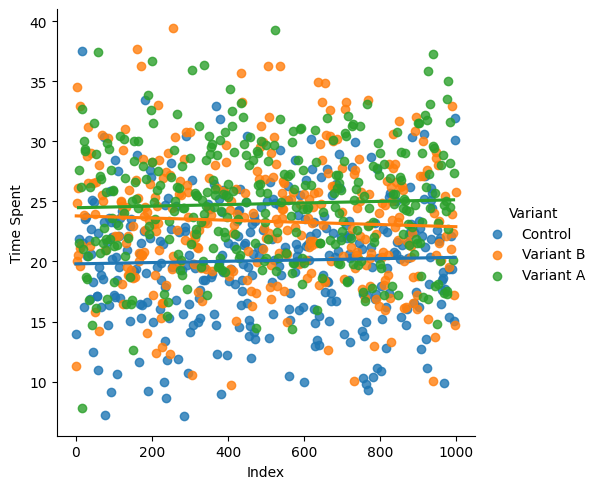

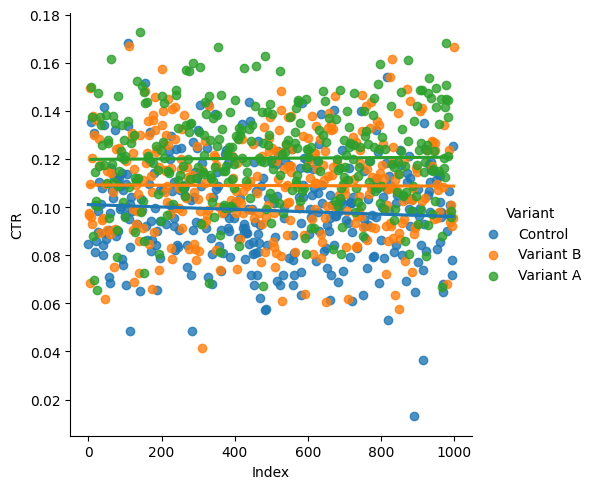

In [43]:
sns.lmplot(data = df, x='CTR', y='Time Spent', hue = 'Variant', ci=None)
sns.lmplot(data = df, x='Index', y='Time Spent', hue = 'Variant', ci=None)
sns.lmplot(data = df, x='Index', y='CTR', hue = 'Variant', ci=None)
plt.show()

Question 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

Based on those test, we do find that the Variant A and the Variant B are much better than the original Control. T-test showed that the differecnce between those variants. ANOVA test showed the difference in means. Also, Variant A has better performence than Variant B both in CTR and Time Spent, so we could focus more on the Variant A. 

Question 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?


For the roll-out plan, I decided to release the feature with multiple steps. The first step is to release a small portion of the feature to the customers, allowing us to identify and address any issues or bugs that may arise. The second step involves establishing an efficient feedback channel to gather customer input, enabling us to continually release new features and improve existing ones based on customer needs. The third step entails ongoing analysis of customer usage data, enabling us to make adjustments to existing features based on the data insights. The final step is to establish a communication channel to effectively explain all released and modified features, aiding customers in better understanding them.